In [1]:
%matplotlib inline
# Imports
import json
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from pandas import read_csv
from astropy.coordinates import SkyCoord
import matplotlib
import glob
from astropy import units as u
from astropy.coordinates import SkyCoord
import os


matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['axes.linewidth'] = 2.

# BRIGHT JSON File Tutorial

In this tutorial, we'll go over how to get data from the JSON files we provide on BRIGHT. The first thing you should do is select the GRB's you want to download data for and hit the "Download on JSON Metadata" button at the top of the page. You'll get everything in a zip file which you can unzip and start working with!

For this example, I have just downloaded the data for GRBs 050509B, 050709, and 050724.

In [2]:
# I prefer to use "glob" to search for all the json files wihtin a folder but you can replace this with
# your favorite method!
path = 'json/'
files = glob.glob(path + '*.json', recursive = True)

### Here are the main parameters in the JSON files: Please see the Nugent et al. 2022 and Fong et al. 2022 papers for more details!

"urls" contains all the URLs for the references. 

"type_GRB" should always be short!

"RA_host", "Dec_host", "tel_pos", "tel_pos_ref" contains the position of the host, the telescope used for the position of the host, and the reference for the position

"host_morphology" - if we know if the galaxy is elliptical or spiral that will be shown here!

"host_SF" - if the host is star-forming, transitioning from star-forming to quiescent, or quiescent

"T90", "fluence", "fluence_err_upper", "fluence_err_lower": the gamma-ray duration and fluence with 1-sigma error

"xray", "opt", "radio" - if the GRB was detected in the x-ray, optical, or radio bands

"offset", "offset_err_upper", "offset_err_lower" - offset in arcsec from GRB to center of host

"offset_kpc", "offset_kpc_err_upper", "offset_kpc_err_lower" - offset in arcsec from GRB to center of host

"offset_ref": offset reference

"Pcc", "Pcc_ref": the probabality of chance coincidence

"frac_flux": fractional flux of the host

"hnorm_offset", "hnorm_offset_err": host normalized offset (in units of effective radius)

"halflightrad", "eff_rad": half light and effective radius of the host

"z", "z_err_upper", "z_err_lower","z_ref": redshift and 1-sigma errors, along with reference

"mass", "mass_err_upper", "mass_err_lower": stellar mass of host and 1-sigma errors

"age", "age_err_upper", "age_err_lower": stellar population age of host and 1-sigma errors

"logzsol", "logzsol_err_upper", "logzsol_err_lower": stellar metallicity of host and 1-sigma errors

"gas_logz", "gas_logz_err_upper", "gas_logz_err_lower": gas-phase metallicity of host and 1-sigma errors

"SFR", "SFR_err_upper", "SFR_err_lower": star formation rate of host and 1-sigma errors

"dust2", "dust2_err_upper", "dust2_err_lower": total dust attenuation of host and 1-sigma errors

"phot", "phot_err", "filters", "telescopes", "phot_refs": photometry, the error, filters, telescopes, and references - if the error is zero, that is an upper limit (photometry is non-extinction corrected in AB magnitude)

"spec", "spec_tel", "spec_ref": the observed spectrum (normalized to photometry in units of micro-Jy), telescope, and reference

"mod_phot", "mod_spec": the Prospector model photometry and spectroscopy, normalized to photometry in units of micro-Jy 

"comments": we typically put if the redshift is from a spectrum or the Prospector fit

"FITS": FITS files names associated with photometry

"corner": Prospector corner plot name

"SED": Prospector SED plot name

"color": host thumbnail name

"H5": Prospector h5 file name

"afterglow": afterglow file name (this will be used on the LGRB not SGRB side)

"GCN": GCN link


# Example

For this example, let's grab the name, the position, the r or R band photometry, and redshift for each of the hosts. Please note that the photometry is in AB magnitudes and non-extinction corrected. Use your favorite dust maps to correct them (which I will not be doing in this tutorial, but I recommend getting this code: https://dustmaps.readthedocs.io/en/latest/examples.html).

In [3]:
# Some lists we'll use to store the data we want
name = []
zred = []
host_coords = []
magAB_r = []
magAB_unc_r = []

for file in files:
    print(file)
    
    # Open and load the JSON file
    f = open(file)
    grb_dict = json.load(f)
    
    # Get the GRB name from the filename
    grb_name = os.path.basename(file)[0:-5]
    # Get filters, photometry + uncertainty, and redshift from JSON file 
    
    # Get filters, photometry + uncertainty, and redshift from JSON file 
    filters = grb_dict['filters']
    phot = grb_dict['phot']
    phot_err = grb_dict['phot_err']
    redshift = grb_dict['z']
    
    # Create an astropy cooridinate from the RA and Dec of the Host
    
    # Had to put a "try" statement in because som JSON files are currently not
    # formatted correctly
    try:
        coords = SkyCoord(grb_dict['RA_host'], grb_dict['Dec_host'], frame='fk5', unit=(u.hourangle, u.deg))
        
        # If we only want the r-band magnitudes, for example
        if 'r' in filters:
            r_phot = np.array(phot)[np.where(np.array(filters) == 'r')][0]
            r_phot_unc = np.array(phot_err)[np.where(np.array(filters) == 'r')][0]

            # Append values to list
            name.append(grb_name)
            magAB_r.append(r_phot)
            magAB_unc_r.append(r_phot_unc)
            zred.append(redshift)
            host_coords.append(coords)

        elif ('r' not in filters) & ('R' in filters):
            # We'll calculate the A_V values in magnitudes to subtract off from photometry
            r_phot = np.array(phot)[np.where(np.array(filters) == 'R')][0] 
            r_phot_unc = np.array(phot_err)[np.where(np.array(filters) == 'R')][0]

            # Append values to list
            name.append(grb_name)
            magAB_r.append(r_phot)
            magAB_unc_r.append(r_phot_unc)
            zred.append(redshift)
            host_coords.append(coords)

        else:
            continue    
        
    except TypeError:
        continue
            
    

json/GRB050509B.json
json/GRB050709.json
json/GRB050724.json


# Print and plot the data

In [4]:
print(host_coords)
print(zred)
print(magAB_r)
print(magAB_unc_r)

[<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (189.05364583, 28.98301111)>, <SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (345.36152083, -38.977895)>, <SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (246.18504167, -27.54066472)>]
[0.2248, 0.1607, 0.254]
[17.12, 21.258, 19.83]
[0.01, 0.07, 0.03]


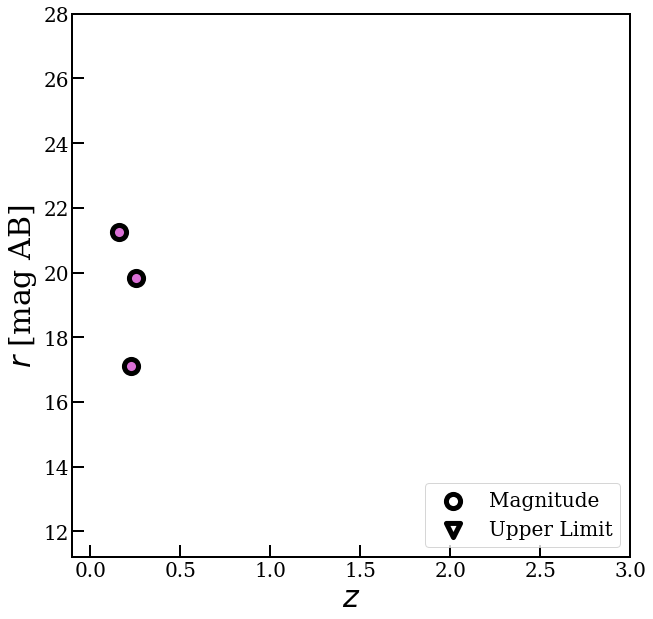

In [5]:
# Basic Plot
fig = plt.figure(figsize=(10,10))

for i in np.arange(0, len(name), 1):
    if zred[i]!= None:
        # If this is an upper limit
        if magAB_unc_r[i] == 0:
            plt.scatter(zred[i], magAB_r[i], color='white', s=200, marker = 'v', edgecolors='purple', linewidths=5)
        # If this is not an upper limit
        else:
            plt.scatter(zred[i], magAB_r[i], color='orchid', s=200, edgecolors='k', linewidths=5)
        
        
plt.xlabel(r'$z$', fontsize=30)
plt.ylabel(r'$r$ [mag AB]', fontsize=30)

plt.scatter(-100, -100, s=200, color='white', edgecolors='k', label='Magnitude', linewidths=5)
plt.scatter(-100, -100, s=200, color='white', marker = 'v', edgecolors='k', label='Upper Limit', linewidths=5)


plt.xlim(-0.1,3.0)
plt.ylim(11.2,28) 
plt.legend(loc='lower right', fontsize=20)


for ax in fig.get_axes():
    ax.tick_params(axis='both', labelsize=20, length=12, width=2, direction='in')
    
    
# When you're ready to save
#plt.savefig('r_band_mag.pdf', dpi=300)
plt.show()